In [145]:
import pandas as pd

In [146]:
import numpy as np

In [147]:
data=pd.read_csv("preterm.csv")

In [148]:
data.head()

,Count Contraction,lenght of contraction,STD,Entropy,Contraction times,Pre-term
0,11055,218320,53231.010,1.860,2,1
1,9118,222820,62367.488,1.580,2,1
2,7925,13481,60503.050,2.067,2,1
3,12451,17474,53628.078,1.731,2,1
4,11152,218320,53317.910,1.857,2,1


In [149]:
data.columns

Index(['Count Contraction', 'lenght of contraction', 'STD', 'Entropy',
       'Contraction times', 'Pre-term'],
      dtype='object')

In [150]:
data.shape

(58, 6)

In [151]:
data.describe()

,Count Contraction,lenght of contraction,STD,Entropy,Contraction times,Pre-term
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,2503.810345,26621.965517,48564.968190,0.879759,0.637931,0.327586
std,3788.639864,61527.769917,8952.845551,0.528180,0.809988,0.473432
min,222.000000,2308.000000,29205.840000,0.428000,0.000000,0.000000
25%,398.000000,2649.500000,42303.962500,0.490500,0.000000,0.000000
50%,495.000000,3371.500000,49307.490000,0.586000,0.000000,0.000000
75%,1988.750000,12093.750000,54374.865000,1.187500,1.000000,1.000000
max,12452.000000,228321.000000,63467.583000,2.067000,2.000000,1.000000


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Count Contraction      58 non-null     int64  
 1   lenght of contraction  58 non-null     int64  
 2   STD                    58 non-null     float64
 3   Entropy                58 non-null     float64
 4   Contraction times      58 non-null     int64  
 5   Pre-term               58 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 2.8 KB


In [153]:
data.columns


Index(['Count Contraction', 'lenght of contraction', 'STD', 'Entropy',
       'Contraction times', 'Pre-term'],
      dtype='object')

In [154]:
X=data.loc[:,['Count Contraction', 'lenght of contraction', 'STD', 'Entropy',
       'Contraction times']]
y=data.loc[:,'Pre-term']

In [155]:
X.head()

,Count Contraction,lenght of contraction,STD,Entropy,Contraction times
0,11055,218320,53231.010,1.860,2
1,9118,222820,62367.488,1.580,2
2,7925,13481,60503.050,2.067,2
3,12451,17474,53628.078,1.731,2
4,11152,218320,53317.910,1.857,2


In [156]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Pre-term, dtype: int64

In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [158]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [159]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [160]:
y_pred = rf_model.predict(X_test)

In [161]:
accuracy = accuracy_score(y_test, y_pred)

In [162]:
print("Random Forest Model Accuracy:", accuracy)

Random Forest Model Accuracy: 1.0


In [163]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [164]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [165]:
# Define the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [166]:
# Train the model
xgb_model.fit(X_train, y_train)

C:\Users\admin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:29:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [167]:
# Predict
y_pred = xgb_model.predict(X_test)

In [168]:
# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Accuracy:", accuracy)

XGBoost Accuracy: 1.0


In [169]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [170]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[11  0]
 [ 0  9]]


In [171]:
from sklearn.model_selection import train_test_split

In [172]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [173]:
from sklearn.neighbors import KNeighborsClassifier

In [174]:
knn_cfr=KNeighborsClassifier(n_neighbors=3)

In [175]:
knn_cfr.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [176]:
y_pred=knn_cfr.predict(X_test)

In [177]:
from sklearn.metrics import accuracy_score

In [178]:
accuracy_score(y_test,y_pred)

1.0

In [187]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [186]:
#comparison

In [179]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [180]:

# Load dataset
df = pd.read_csv("preterm.csv")

In [181]:
# Select features and target
X = df[['Count Contraction', 'lenght of contraction', 'STD', 'Entropy', 'Contraction times']]
y = df['Pre-term']

In [182]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [183]:
# Initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN (k=3)": KNeighborsClassifier(n_neighbors=3),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}


In [184]:
# Train and evaluate
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)


C:\Users\admin\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:29:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


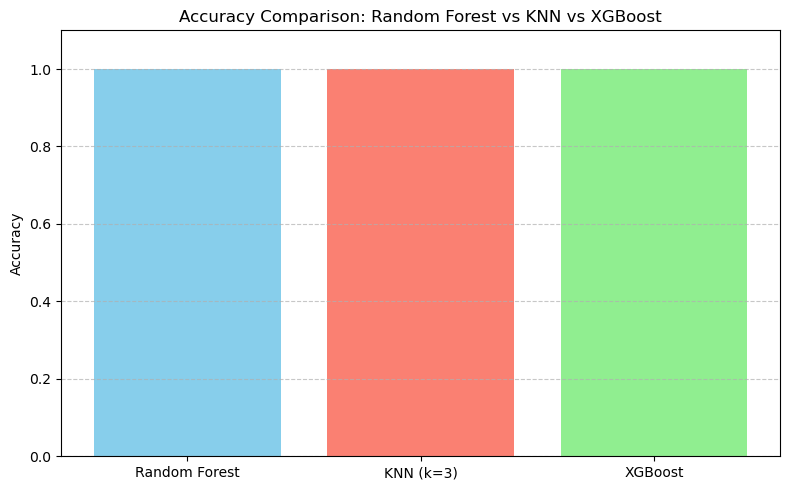

In [185]:
# Plot the accuracies
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue', 'salmon', 'lightgreen'])
plt.ylabel("Accuracy")
plt.ylim(0, 1.1)
plt.title("Accuracy Comparison: Random Forest vs KNN vs XGBoost")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
